
# 🎓 초급 딥러닝 미션:
# 딥러닝 학교 – 마법 신경망으로 세계를 구하라!

---

## 🏰 배경 스토리

당신은 **AI 마법학교의 입학생**입니다.  
이 학교에서는 사람의 감정, 날씨, 질병을 예측하는 **마법 신경망**을 수련합니다.  
당신의 첫 수업은 **딥러닝 기초 수련**입니다.  
당신은 NumPy만으로 **마법 신경망**을 직접 구현하고, 다양한 마법서(Optimizer)를 실험하며,  
마지막엔 **PyTorch 마법 시스템**에 입문하게 됩니다.

---

## 🎯 미션 학습 목표

- 딥러닝 구조 및 원리 이해 (forward, loss, backward)
- 학습률 개념 실험
- 옵티마이저 종류 비교 (SGD, Momentum, RMSProp, Adam)
- 파이토치 기초 문법 학습 및 비교

---

## 🧩 미션 구성



### ✅ Part 1. 딥러닝 개요 퀴즈

1. 딥러닝에서 '신경망'이란 무엇을 모방한 것인가요?  
   a. 컴퓨터 회로  
   b. 인간 뇌의 뉴런 구조  *
   c. 수학 공식  
   d. 로봇 제어기

2. Backpropagation은 무엇을 계산하는 과정인가요?  
   a. 데이터 전처리  
   b. 예측 결과 시각화  
   c. 손실 함수의 그래디언트를 역방향으로 계산  * 
   d. 예측값을 정규화하는 함수



### ✅ Part 2. NumPy 기반 신경망 실습

#### 🎯 문제: XOR 문제를 NumPy만으로 푸는 2층 신경망을 직접 구현해보세요.

- 입력: 2차원 벡터 (ex: [0,1], [1,1])
- 출력: 0 또는 1
- 구조: 입력(2) → 은닉층(4, ReLU) → 출력층(1, Sigmoid)
- 손실 함수: Binary Cross Entropy

#### ✏️ 구현 항목
1. forward() – 순전파 계산
2. compute_loss() – 손실 계산
3. backward() – 역전파 계산 (Chain Rule 기반)
4. update_weights() – SGD 기반 파라미터 갱신 ==> 중요함!!
5. 학습률 변화 실험 (0.001 / 0.01 / 0.1)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [15]:
def reset_weights(seed=42):
    global W1, b1, W2, b2
    np.random.seed(seed)
    W1 = np.random.randn(2, 4)  # 입력 2 → 은닉 4
    b1 = np.zeros((1, 4))
    W2 = np.random.randn(4, 1)  # 은닉 4 → 출력 1
    b2 = np.zeros((1, 1))


In [16]:
reset_weights()

In [17]:
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [18]:
# 순전파
def forward(X):
    global Z1, A1, Z2, y_pred
    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    y_pred = Z2  # 선형 출력
    return y_pred

# 손실 함수 (Binary Cross Entropy)
def compute_loss(y_true):
    y_out = sigmoid(y_pred)
    eps = 1e-7
    return -np.mean(y_true * np.log(y_out + eps) + (1 - y_true) * np.log(1 - y_out + eps))

# 역전파 (gradient 계산만 수행)
def backward(X, y_true):
    m = X.shape[0]
    y_out = sigmoid(y_pred)

    dZ2 = (y_out - y_true) / m
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_grad(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2

# SGD 기반 파라미터 갱신
def update_weights(dW1, db1, dW2, db2, lr):
    global W1, b1, W2, b2
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

def train(lr=0.01, epochs=10000, verbose=True):
    loss_history = []

    for epoch in range(epochs):
        forward(X)
        loss = compute_loss(y)
        loss_history.append(loss)

        dW1, db1, dW2, db2 = backward(X, y)
        update_weights(dW1, db1, dW2, db2, lr)

        if verbose and epoch % 1000 == 0:
            print(f"Epoch {epoch:5d} | Loss: {loss:.4f}")

    # 최종 예측 결과 출력
    forward(X)
    print(f"\n[lr={lr}] 최종 예측 결과 (Sigmoid 적용 후):")
    print(np.round(sigmoid(y_pred), 3))

    return loss_history


Epoch     0 | Loss: 0.9179
Epoch  1000 | Loss: 0.7305
Epoch  2000 | Loss: 0.7047
Epoch  3000 | Loss: 0.6992
Epoch  4000 | Loss: 0.6967
Epoch  5000 | Loss: 0.6948
Epoch  6000 | Loss: 0.6932
Epoch  7000 | Loss: 0.6917
Epoch  8000 | Loss: 0.6903
Epoch  9000 | Loss: 0.6888

[lr=0.001] 최종 예측 결과 (Sigmoid 적용 후):
[[0.553]
 [0.505]
 [0.504]
 [0.439]]
Epoch     0 | Loss: 0.9179
Epoch  1000 | Loss: 0.6873
Epoch  2000 | Loss: 0.6624
Epoch  3000 | Loss: 0.6083
Epoch  4000 | Loss: 0.4674
Epoch  5000 | Loss: 0.3350
Epoch  6000 | Loss: 0.2285
Epoch  7000 | Loss: 0.1577
Epoch  8000 | Loss: 0.1138
Epoch  9000 | Loss: 0.0861

[lr=0.01] 최종 예측 결과 (Sigmoid 적용 후):
[[0.144]
 [0.957]
 [0.959]
 [0.029]]
Epoch     0 | Loss: 0.9179
Epoch  1000 | Loss: 0.0686
Epoch  2000 | Loss: 0.0183
Epoch  3000 | Loss: 0.0098
Epoch  4000 | Loss: 0.0066
Epoch  5000 | Loss: 0.0049
Epoch  6000 | Loss: 0.0039
Epoch  7000 | Loss: 0.0032
Epoch  8000 | Loss: 0.0027
Epoch  9000 | Loss: 0.0024

[lr=0.1] 최종 예측 결과 (Sigmoid 적용 후):
[[0.006]

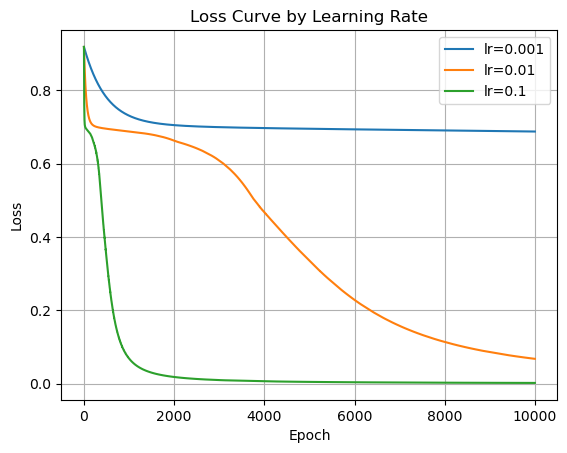

In [19]:
def experiment_with_lr(lr_list, epochs=10000):
    losses_all = []

    for lr in lr_list:
        reset_weights()  # 동일 초기값으로 실험
        losses = train(lr=lr, epochs=epochs)
        losses_all.append(losses)

    return losses_all

def plot_losses(losses_list, labels):
    for losses, label in zip(losses_list, labels):
        plt.plot(losses, label=f"lr={label}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve by Learning Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

# 학습률 목록
learning_rates = [0.001, 0.01, 0.1]

# 실험 실행
all_losses = experiment_with_lr(learning_rates)

# 시각화
plot_losses(all_losses, learning_rates)



### ✅ Part 3. 다양한 옵티마이저 실험 (NumPy 구현 or 의사코드)

| Optimizer | 설명 |
|-----------|------|
| SGD | 가장 기본적인 경사하강법 |
| Momentum | 이전 기울기를 누적하여 반동 효과 부여 |
| RMSProp | 각 파라미터별 적응적 학습률 적용 |
| Adam | Momentum + RMSProp을 결합한 대표적 옵티마이저 |


아래 코드는 어떤 방식의 옵티마이저의 구현인지 답하시오.
Momentum


In [20]:
# 💡 간단한 옵티마이저 의사코드 예시임. 
v = 0
v = beta * v + (1 - beta) * grad
w = w - learning_rate * v


NameError: name 'beta' is not defined


### ✅ Part 4. PyTorch 입문 과제

이제부터는 AI 마법학교의 공식 프레임워크인 **PyTorch**를 배웁니다!

#### 🎯 미션: 위 XOR 문제를 PyTorch로 다시 풀어보세요.
- PyTorch로 간단한 학습 루프 예제 코드를 검색해서 찾아서 직접 작성해보세요.
- torch.nn.Linear, torch.ReLU, torch.Sigmoid, torch.BCELoss 등 사용
- torch.optim.SGD, Adam, RMSprop 등 Optimizer로 비교


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

# 데이터 정의
X = torch.tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 모델 정의
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

# 손실 함수 및 옵티마이저
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # 변경 가능: SGD, RMSprop 등

# 학습 루프
epochs = 10000
for epoch in range(epochs):
    # 순전파
    outputs = model(X)
    loss = criterion(outputs, y)

    # 역전파 + 가중치 갱신
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 출력
    if epoch % 1000 == 0:
        print(f"Epoch {epoch:5d} | Loss: {loss.item():.4f}")

# 최종 예측 결과
with torch.no_grad():
    preds = model(X)
    print("\n예측 결과:")
    print(torch.round(preds))


Epoch     0 | Loss: 0.7296
Epoch  1000 | Loss: 0.0052
Epoch  2000 | Loss: 0.0013
Epoch  3000 | Loss: 0.0006
Epoch  4000 | Loss: 0.0003
Epoch  5000 | Loss: 0.0001
Epoch  6000 | Loss: 0.0001
Epoch  7000 | Loss: 0.0000
Epoch  8000 | Loss: 0.0000
Epoch  9000 | Loss: 0.0000

예측 결과:
tensor([[0.],
        [1.],
        [1.],
        [0.]])



## 🏁 마무리 퀴즈

1. 학습률이 너무 크면 발생할 수 있는 문제는?
   - a. 과적합  
   - b. 손실 발산  * 
   - c. 더 정밀한 학습  
   - d. 정확도가 무조건 올라감

2. Adam 옵티마이저는 어떤 두 가지 개념을 결합한 것인가요?
   - a. LSTM + GRU  
   - b. SGD + Dropout  
   - c. Momentum + RMSProp  *
   - d. SGD + AdaGrad



## 🎁 보너스 미션 (선택)

- 직접 XOR이 아닌 make_moons, make_circles 등의 데이터셋으로 실험해보세요.
- 은닉층의 노드 수를 바꿔가며 학습 성능을 비교해보세요.

